In [7]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt

import time
from scipy.stats import linregress

In [8]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
movies_df = pd.read_csv("IMDB Movies-inflation_1.csv")

# Display sample data
movies_df.head()

,original_title,year,genre 1 kaggle,genre 2 kaggle,genre 3 kaggle,duration,country,language_1,director,writer,...,actors_1,actors_f2,description,desc35,avg_vote,Budget - Inflation Adjusted,USA Gross Income - Inflation Adjusted,USA_Profit,WW Gross Income - Inflation Adjusted,WorldWide_Profit
0,Pirates of the Caribbean: At World's End,2007,Action,Adventure,Fantasy,169,USA,English,Gore Verbinski,"Ted Elliott, Terry Rossio",...,Johnny Depp,"Johnny Depp, Geoffrey Rush","Captain Barbossa, Will Turner and Elizabeth Sw...","Captain Barbossa, Will Turner",7.1,3.744697e+08,3.862286e+08,8.622860e+07,1.389107e+17,1.389107e+17
1,Harry Potter and the Order of the Phoenix,2007,Action,Adventure,Family,138,"UK, USA",English,David Yates,"Michael Goldenberg, J.K. Rowling",...,Daniel Radcliffe,"Daniel Radcliffe, Harry Melling",With their warning about Lord Voldemort's (Ral...,With their warning about Lord,7.5,1.872349e+08,3.649250e+08,2.149250e+08,1.361840e+17,1.361840e+17
2,Spider-Man 3,2007,Action,Adventure,Sci-Fi,139,USA,English,Sam Raimi,"Sam Raimi, Ivan Raimi",...,Tobey Maguire,"Tobey Maguire, Kirsten Dunst",A strange black entity from another world bond...,A strange black entity from another,6.2,3.220440e+08,4.200680e+08,1.620680e+08,1.293685e+17,1.293685e+17
3,Shrek the Third,2007,Animation,Adventure,Comedy,93,USA,English,"Chris Miller, Raman Hui","Jeffrey Price, Peter S. Seaman",...,Mike Myers,"Mike Myers, Eddie Murphy","When his new father-in-law, King Harold falls ...","When his new father-in-law, King",6.1,1.997172e+08,4.028295e+08,2.428295e+08,1.175711e+17,1.175711e+17
4,Transformers,2007,Action,Adventure,Sci-Fi,144,USA,English,Michael Bay,"Roberto Orci, Alex Kurtzman",...,Shia LaBeouf,"Shia LaBeouf, Megan Fox",An ancient struggle between two Cybertronian r...,An ancient struggle between two,7.0,1.872349e+08,3.984934e+08,2.484934e+08,1.025875e+17,1.025875e+17


## Average rating of all movies for each year

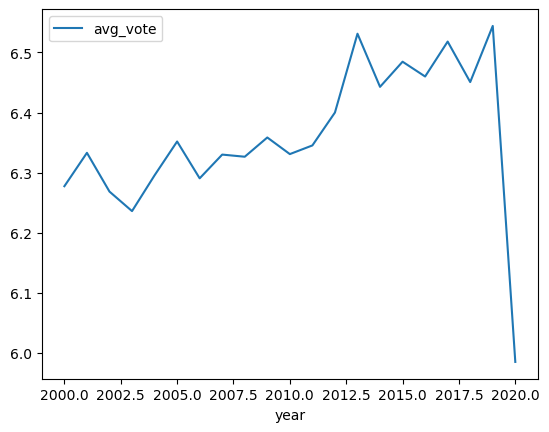

In [9]:
#groupby year to get the average of desired column

avg_vote = movies_df.groupby("year")["avg_vote"].mean()

#turn function into a DataFrame

avg_vote_df = pd.DataFrame(avg_vote)

#plot using matplotlib

lines = avg_vote_df.plot.line()

## Average profit of each movie by year

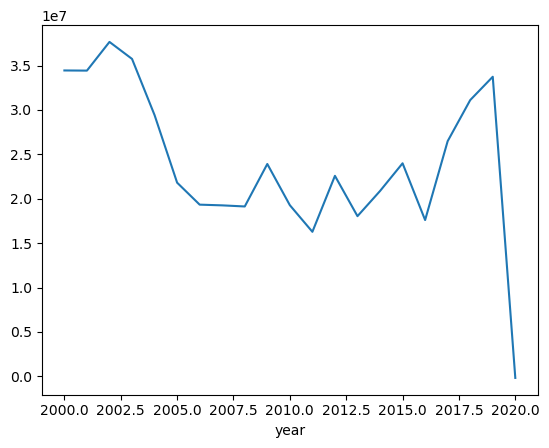

In [10]:
#groupby year to get the average of desired column

avg_profit = movies_df.groupby("year")["USA_Profit"].mean()

#turn function into a DataFrame

avg_profit_df = pd.DataFrame(avg_profit)

avg_profit_df = avg_profit_df["USA_Profit"].astype('int64')

#plot using matplotlib

lines = avg_profit_df.plot.line()

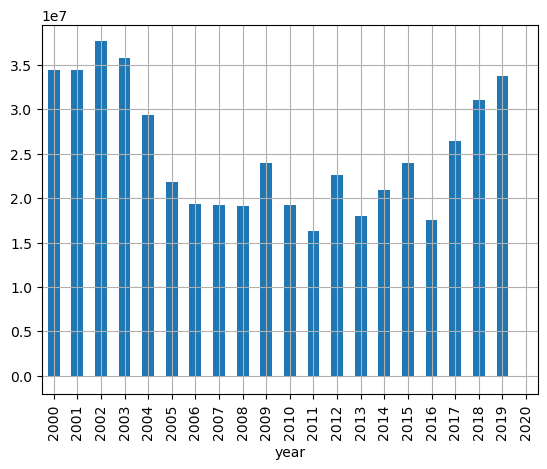

In [11]:
avg_profit_df.plot(kind="bar", x="year", y="USA Profit", grid=True)

plt.show()

## Average Budget of all movies in year

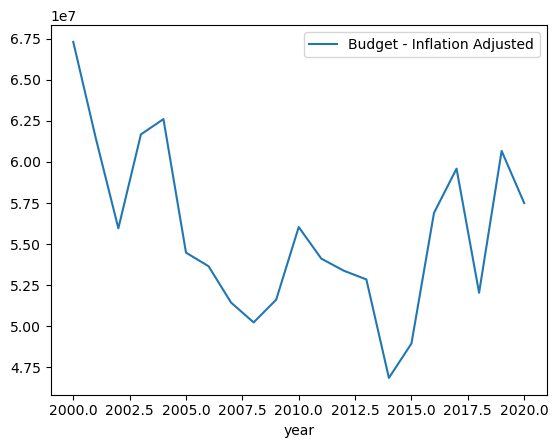

In [13]:
#groupby year to get the average of desired column

avg_budget = movies_df.groupby("year")["Budget - Inflation Adjusted"].mean()

#turn function into a DataFrame

avg_budget_df = pd.DataFrame(avg_budget)

#plot using matplotlib

lines = avg_budget_df.plot.line()

## Total Profit

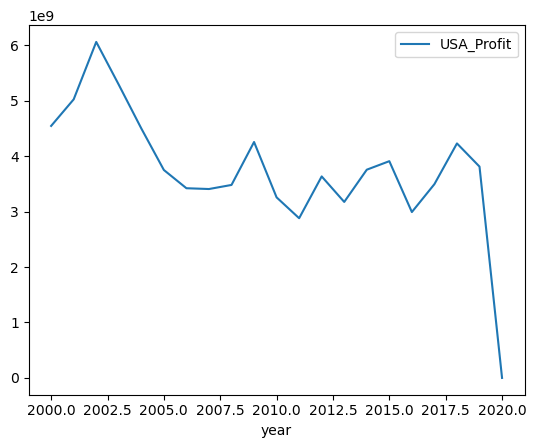

In [14]:
Total_profit = movies_df.groupby("year")["USA_Profit"].sum()

#turn function into a DataFrame

Total_profit_df = pd.DataFrame(Total_profit)

#plot using matplotlib

lines = Total_profit_df.plot.line()

## Total Budget

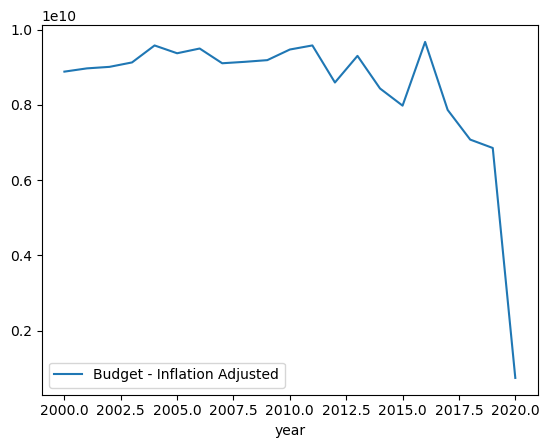

In [15]:
total_budget = movies_df.groupby("year")["Budget - Inflation Adjusted"].sum()

#turn function into a DataFrame

total_budget_df = pd.DataFrame(total_budget)

#plot using matplotlib

lines = total_budget_df.plot.line()

R squared: 0.06360095726466516


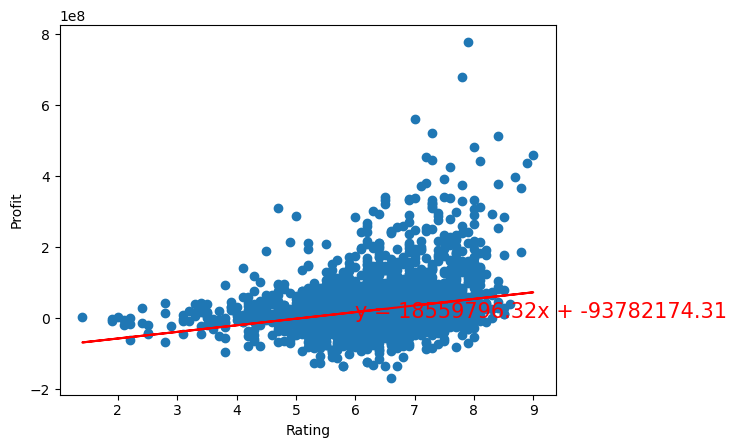

In [16]:
 ## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = movies_df["avg_vote"].astype("float")
y_values = movies_df["USA_Profit"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Rating')
plt.ylabel('Profit')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.07048951832089485


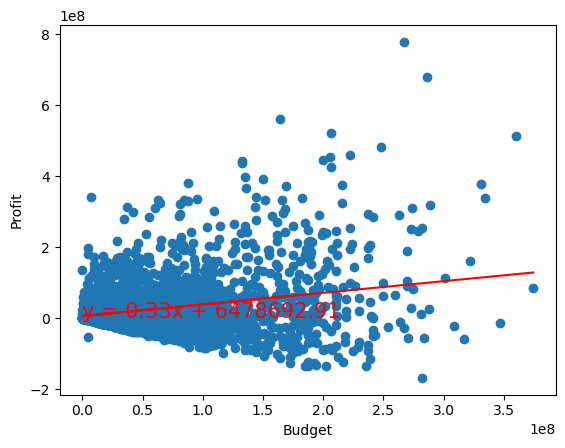

In [17]:
 ## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = movies_df["Budget - Inflation Adjusted"].astype("float")
y_values = movies_df["USA_Profit"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Budget')
plt.ylabel('Profit')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()